# Midterm Project

# Text Classification for NewsLetter Categories

In [2]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords,wordnet

In [2]:
# Download stopwords
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\SAI
[nltk_data]     SWETHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\SAI
[nltk_data]     SWETHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\SAI
[nltk_data]     SWETHA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Data Collection and Cleaning

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/dataset_newsletter.csv")
df = df.drop('Unnamed: 0', axis=1)
df

,title,body,signature,submissiontime,category
0,Mrs. Laurence Class,"Because of the upcoming holiday, we will be re...",Jaslynn Laurence,11/18/15 9:26 AM,ANNOUNCEMENTS
1,Mr. Valle's Winter Break Packets (Cornell/Hamp...,"All my Cornell, Hampton, and Princeton student...",Mr. Sam Valle,12/16/15 9:26 PM,ANNOUNCEMENTS
2,Hours of Operation,"Parents/Guardians, We will gladly assist yo...",Ms. Ellis,11/18/15 3:30 PM,ANNOUNCEMENTS
3,Character Education,CMIT South scholars will continue to work on v...,Ch.Ed. Team Room 163,11/15/15 4:49 PM,ANNOUNCEMENTS
4,CMIT Students Connecting with Students Around ...,A couple of classes have had the opportunity t...,Srta. Dickerson,11/16/15 5:21 AM,ANNOUNCEMENTS
...,...,...,...,...,...
19602,Ms. Coholic's Science Classes,"Hello all! This week, BioGeoChem students wil...",Suzanne Coholic High School Science Teacher S...,1/11/23 10:28 AM,ANNOUNCEMENTS
19603,AP Exams,Clock is ticking and we have four months until...,Nabil Siddiqui,1/13/23 9:43 AM,ANNOUNCEMENTS
19604,Ever thought of becoming a Software Engineer?,This after school club can benefit all the com...,Nabil Siddiqui,1/13/23 9:49 AM,CLUBS
19605,Last Call! Women's Lacrosse Interest,Last Call! The Women's Lacrosse Program is hav...,Serey Sok CMIT Women's Lacrosse & Women's Socc...,1/15/23 8:29 PM,CLUBS


In [66]:
#Checking for null values
df.isnull().sum()

title              10
body                3
signature         400
submissiontime      0
category            0
dtype: int64

In [61]:
# Fill null values in 'signature', 'body' and 'title' columns with a default value
df['signature'].fillna('Unknown', inplace=True)
df['title'].fillna('No Title', inplace=True)
df['body'].fillna('No body', inplace=True)

In [62]:
# Convert text to lowercase
df["body"] = df["body"].str.lower()

C:\Users\SAI SWETHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CountPlot')

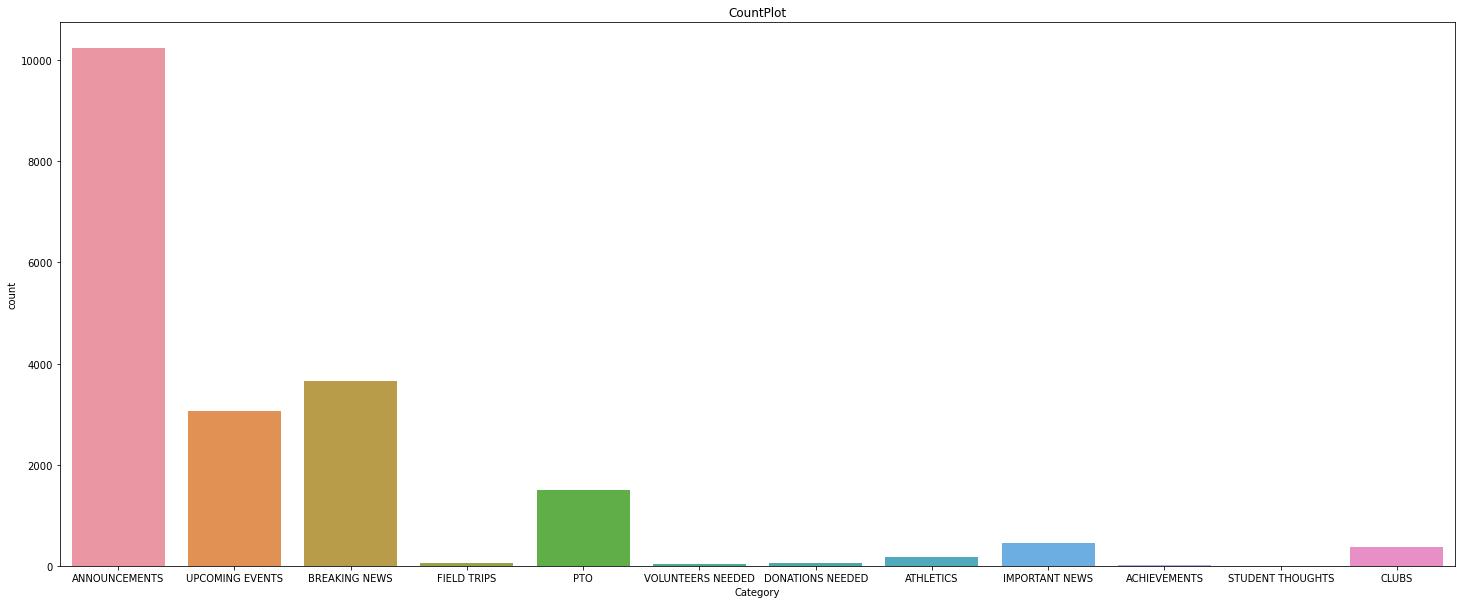

In [63]:
#Plotting count plot
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(df['category'])
plt.xlabel('Category')
plt.title('CountPlot')

## Feature Engineering

Performed feature engineering by removing stop words and punctuations from the body column and preprocessing the data using lemmatization. This can help to reduce the sparsity of the vocabulary and improve the accuracy of text classification.

In [6]:
# Remove punctuations from "body"
translator = str.maketrans("", "", string.punctuation)
df["body"] = df["body"].apply(lambda x: x.translate(translator))

In [7]:
# Preprocess the text data using lemmatization and stopword removal
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
df['body'] = df['body'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in stop_words]))

In [8]:
le = LabelEncoder()  
df["category"] = le.fit_transform(df["category"])

## Train and Test Split

In [9]:
# Split the dataset into training and testing sets
X = df['body']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating Pipelines 

In [10]:
# SVM model with linear kernel and CountVectorizer
svm_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', SVC(kernel='linear'))
])

In [11]:
# Random Forest model with TfidfVectorizer
rf_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])


In [12]:
# Gradient Boosting model with TfidfVectorizer
gb_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', GradientBoostingClassifier(n_estimators=200, random_state=42))
])


In [13]:
# Logistic Regression model with TfidfVectorizer
lr_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', LogisticRegression(random_state=42))
])

In [14]:
# List of pipelines for easy iteration
pipelines = [svm_pipeline, rf_pipeline, gb_pipeline, lr_pipeline]

## Model Fitting

### Support Vector Machine (SVM) Model

In [15]:
svm_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', SVC(kernel='linear'))])

In [16]:
# Predictions on test set
y_pred = svm_pipeline.predict(X_test)

In [17]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7006629270780215


In [18]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.76      0.82      0.79      2105
           2       0.75      0.51      0.61        41
           3       0.61      0.53      0.57       693
           4       0.72      0.59      0.65        58
           5       0.73      0.73      0.73        11
           6       0.40      0.17      0.24        12
           7       0.24      0.20      0.22        75
           8       0.71      0.66      0.68       303
           9       0.00      0.00      0.00         1
          10       0.61      0.59      0.60       614
          11       0.75      0.60      0.67         5

    accuracy                           0.70      3922
   macro avg       0.52      0.45      0.48      3922
weighted avg       0.69      0.70      0.70      3922



C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
# Dictionary of pipeline parameters to tune
params = {
    'vectorizer__max_features': [5000, 10000, 20000],
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': [0.1, 1, 10]
}

In [20]:
# Create a GridSearchCV object
grid_search = GridSearchCV(svm_pipeline, params)

In [21]:
# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', SVC(kernel='linear'))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'classifier__gamma': [0.1, 1, 10],
                         'vectorizer__max_features': [5000, 10000, 20000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2)]})

In [22]:
# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Best parameters found by GridSearchCV: {'classifier__C': 0.1, 'classifier__gamma': 0.1, 'vectorizer__max_features': 20000, 'vectorizer__ngram_range': (1, 2)}


In [23]:
# Predict on the test data with the best model
y_pred_grid = grid_search.predict(X_test)

In [24]:
# Evaluate the accuracy of the best model
print("Accuracy:", accuracy_score(y_test, y_pred_grid))

Accuracy: 0.7172361040285569


### Random Forest Model

In [25]:
rf_pipeline.fit(X_train, y_train)  

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 RandomForestClassifier(n_estimators=200, random_state=42))])

In [26]:
# Predictions on test set
y_pred_rf = rf_pipeline.predict(X_test)

In [27]:
# Evaluate the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Accuracy: 0.7009178990311066


In [28]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.68      0.96      0.79      2105
           2       1.00      0.17      0.29        41
           3       0.76      0.33      0.46       693
           4       1.00      0.21      0.34        58
           5       1.00      0.64      0.78        11
           6       0.50      0.08      0.14        12
           7       0.30      0.04      0.07        75
           8       0.88      0.57      0.69       303
           9       0.00      0.00      0.00         1
          10       0.75      0.49      0.59       614
          11       0.50      0.20      0.29         5

    accuracy                           0.70      3922
   macro avg       0.61      0.31      0.37      3922
weighted avg       0.72      0.70      0.67      3922



C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient Boosting Model

In [42]:
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier',
                 GradientBoostingClassifier(n_estimators=200,
                                            random_state=42))])

In [44]:
# Predictions on test set
y_pred_gb = gb_pipeline.predict(X_test)

In [45]:
# Evaluate the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Accuracy: 0.676185619581846


In [46]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      0.92      0.78      2105
           2       0.68      0.46      0.55        41
           3       0.75      0.31      0.44       693
           4       0.57      0.47      0.51        58
           5       0.78      0.64      0.70        11
           6       0.23      0.25      0.24        12
           7       0.29      0.16      0.21        75
           8       0.71      0.63      0.67       303
           9       0.00      0.00      0.00         1
          10       0.72      0.39      0.51       614
          11       0.22      0.40      0.29         5

    accuracy                           0.68      3922
   macro avg       0.47      0.39      0.41      3922
weighted avg       0.69      0.68      0.65      3922



### Logistic Regression Model

In [56]:
lr_pipeline.fit(X_train, y_train)

C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(random_state=42))])

In [57]:
# Predictions on test set
y_pred_lr = lr_pipeline.predict(X_test)

In [58]:
# Evaluate the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.6886792452830188


In [59]:
# Print classification report and confusion matrix
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.70      0.89      0.79      2105
           2       0.64      0.17      0.27        41
           3       0.65      0.42      0.51       693
           4       0.82      0.24      0.37        58
           5       1.00      0.09      0.17        11
           6       0.00      0.00      0.00        12
           7       0.67      0.03      0.05        75
           8       0.74      0.57      0.64       303
           9       0.00      0.00      0.00         1
          10       0.63      0.54      0.58       614
          11       0.00      0.00      0.00         5

    accuracy                           0.69      3922
   macro avg       0.49      0.25      0.28      3922
weighted avg       0.68      0.69      0.66      3922



C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SAI SWETHA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
